# 実験レポート１
## 電気抵抗の温度変化
提出期限：９月９日（金）午後５時までにメールすること！

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
sns.set()

測定したデータを以下に示す。

In [2]:
df = pd.read_csv('http://academia.rdy.jp/moonriver/wp-content/uploads/2019/09/mydata001.csv')
df.head()

,ti,Ri
0,26.1,15.421
1,33.7,15.800
2,40.2,16.096
3,47.8,16.537
4,55.3,17.008


In [3]:
df.describe()

,ti,Ri
count,10.000000,10.000000
mean,59.010000,17.252400
std,22.253811,1.296285
min,26.100000,15.421000
25%,42.100000,16.206250
50%,58.950000,17.231000
75%,75.400000,18.213750
max,92.100000,19.205000


生データをとりあえずプロットしておく。

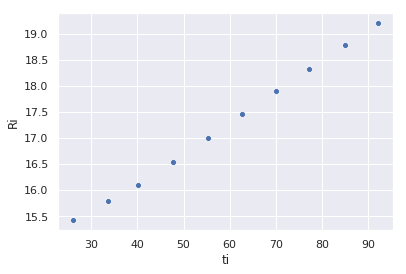

In [4]:
sns.scatterplot(x='ti', y='Ri', data=df)

温度を絶対温度にしておく。

In [5]:
df['Ti'] = df['ti'] + 273.15
df.head()

,ti,Ri,Ti
0,26.1,15.421,299.25
1,33.7,15.800,306.85
2,40.2,16.096,313.35
3,47.8,16.537,320.95
4,55.3,17.008,328.45


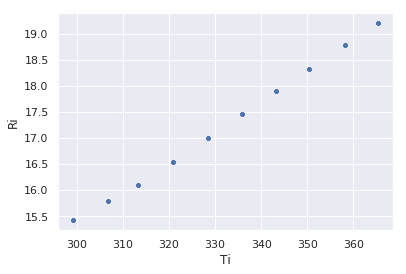

In [6]:
sns.scatterplot(x='Ti', y='Ri', data=df)

横軸は、絶対温度。

# 最小自乗法

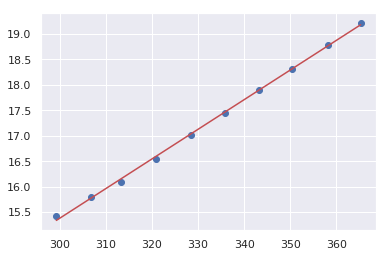

In [7]:
reg = linear_model.LinearRegression()
X = df['Ti'].values.reshape(-1, 1)
Y = df['Ri'].values
reg_fit = reg.fit(X, Y)
plt.scatter(X, Y)
plt.plot(X, reg.predict(X), 'r')

In [8]:
print(reg_fit.coef_)
print(reg_fit.intercept_)

[0.05821705]
-2.0849743467092345


$y$切片の値が負なのはおかしい。（抵抗は、絶対温度がゼロでも負にはならない。）

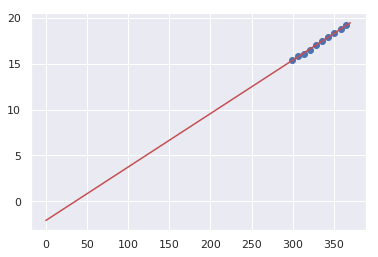

In [9]:
W = np.linspace(0,370,100).reshape(-1, 1)
plt.scatter(X, Y)
plt.plot(W, reg.predict(W),'r')

横軸の範囲を広げて回帰直線を書いてみた。$y$切片の値が負なのは、測定値の誤差の範囲内か？

In [10]:
Y

array([15.421, 15.8  , 16.096, 16.537, 17.008, 17.454, 17.904, 18.317,
       18.782, 19.205])

測定した抵抗の値。

In [11]:
YY = Y + np.random.normal(loc=0.0, scale=0.2, size=len(Y))
YY

array([15.34204799, 15.93787255, 16.32014822, 16.68488802, 17.13146242,
       17.7161027 , 17.72830445, 18.5214186 , 18.90363055, 19.0910809 ])

少し、正規分布の乱数を加えてみる。

[0.05707479]
-1.6202656082531846


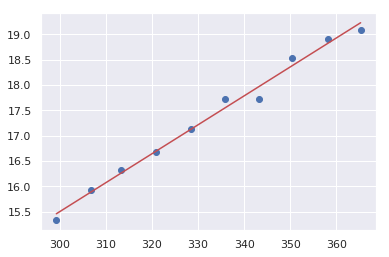

In [12]:
reg_fit = reg.fit(X, YY)
plt.scatter(X, YY)
plt.plot(X, reg.predict(X), 'r')
print(reg_fit.coef_)
print(reg_fit.intercept_)

それでも、$y$切片の値は負だな。。（本当は、乱数のタネを変えて何度もやるべき。タネを指定していなければ、毎回異なる乱数が生成されるが。）

In [13]:
df['Ti'].values.reshape(-1, 1)

array([[299.25],
       [306.85],
       [313.35],
       [320.95],
       [328.45],
       [335.75],
       [343.15],
       [350.35],
       [358.25],
       [365.25]])

In [14]:
df['Ti'].values

array([299.25, 306.85, 313.35, 320.95, 328.45, 335.75, 343.15, 350.35,
       358.25, 365.25])

In [15]:
df['Ti']

0    299.25
1    306.85
2    313.35
3    320.95
4    328.45
5    335.75
6    343.15
7    350.35
8    358.25
9    365.25
Name: Ti, dtype: float64